# Assignment 1 Feed Forward

11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/11
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6484 - accuracy: 0.8222 - val_loss: 0.3128 - val_accuracy: 0.9118
Epoch 2/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2947 - accuracy: 0.9160 - val_loss: 0.2493 - val_accuracy: 0.9297
Epoch 3/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2426 - accuracy: 0.9306 - val_loss: 0.2175 - val_accuracy: 0.9371
Epoch 4/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2099 - accuracy: 0.9401 - val_loss: 0.1909 - val_accuracy: 0.9434
Epoch 5/11
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1853 - accuracy: 0.9456 - val_loss: 0.1731 - val_accuracy: 0.9480
Epoch 6/11
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1659 - accuracy: 0.9528 - val_loss: 0.1571 - val_accuracy: 0.9523
Epoch 7/11
1875/1875 [==============================] - 3s 1ms/step - l

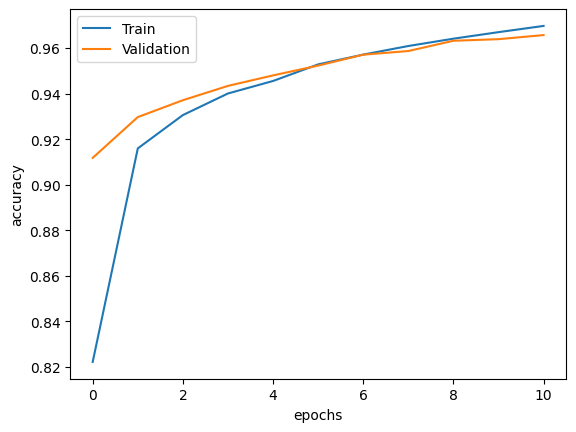

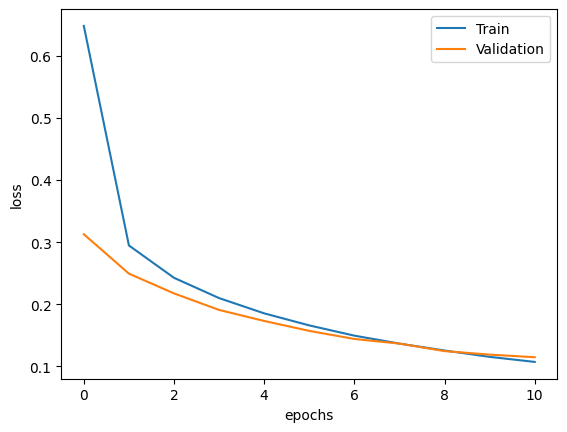

In [1]:
# a. Import the necessary packages

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt

# b. Load training and testing data

(X_train, Y_train), (x_test, y_test) = mnist.load_data()

X_train.shape

#Transform data
X_train = X_train.reshape((X_train.shape[0], -1))
X_train.shape
x_test = x_test.reshape(x_test.shape[0], -1)
X_train = X_train/255
x_test = x_test/255

lb = LabelBinarizer()

Y_train = lb.fit_transform(Y_train);
y_test = lb.transform(y_test)

# c. Define the network architecture using Keras


model = Sequential()
#for the cifar10 dataset input shape will be 3074
model.add(Dense(128, input_shape=(784,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

# d. Train the model using SGD/Adam optimizer

epoch = 11
sgd = SGD(0.01)
model.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ["accuracy"] )

H = model.fit(X_train, Y_train, validation_data = (x_test, y_test), epochs = epoch)
model.summary()


# e. Evaluate the network

predictions = model.predict(x_test)
print(classification_report(y_test.argmax(axis = 1), predictions.argmax(axis = 1)))
test_loss, test_accu = model.evaluate(x_test, y_test)
print(test_loss)
print("test accuracy = ", test_accu)

# f. Plot graphs



plt.plot(H.history["accuracy"])
plt.plot(H.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["Train", "Validation"])
plt.show()

plt.plot(H.history["loss"])
plt.plot(H.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["Train", "Validation"])
plt.show()


# CNN with 4 Stages

Epoch 1/10
391/391 [==============================] - 26s 65ms/step - loss: 2.2336 - accuracy: 0.1814 - val_loss: 2.0918 - val_accuracy: 0.2663
Epoch 2/10
391/391 [==============================] - 25s 65ms/step - loss: 1.9874 - accuracy: 0.2870 - val_loss: 1.9057 - val_accuracy: 0.3331
Epoch 3/10
391/391 [==============================] - 28s 71ms/step - loss: 1.8667 - accuracy: 0.3393 - val_loss: 1.8004 - val_accuracy: 0.3658
Epoch 4/10
391/391 [==============================] - 25s 65ms/step - loss: 1.7595 - accuracy: 0.3797 - val_loss: 1.7110 - val_accuracy: 0.3910
Epoch 5/10
391/391 [==============================] - 26s 67ms/step - loss: 1.6679 - accuracy: 0.4105 - val_loss: 1.6491 - val_accuracy: 0.4040
Epoch 6/10
391/391 [==============================] - 24s 62ms/step - loss: 1.5925 - accuracy: 0.4347 - val_loss: 1.5843 - val_accuracy: 0.4409
Epoch 7/10
391/391 [==============================] - 24s 62ms/step - loss: 1.5325 - accuracy: 0.4551 - val_loss: 1.5187 - val_accuracy:

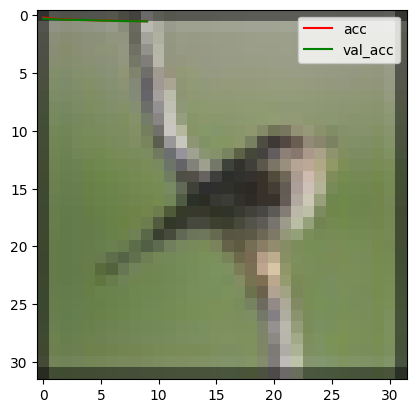

In [4]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

lb= LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

sgd = SGD(0.01)
epochs = 10

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)

h = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=128)

pred = model.predict(x_test, batch_size=128)
report = classification_report(y_test.argmax(axis=1), pred.argmax(axis=1), target_names =[str(x) for x in lb.classes_])
print(report)

plt.plot(h.history['accuracy'], label='acc', color='red')
plt.plot(h.history['val_accuracy'], label='val_acc', color='green')
plt.legend()
plt.show()

image_index = 3333
plt.imshow(x_test[image_index].reshape(32, 32, 3),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 32, 32, 3))
print(pred.argmax())



# AutoEncoder

Epoch 1/10
73/73 [==============================] - 2s 4ms/step - loss: 0.0066 - mse: 0.0147 - val_loss: 0.0097 - val_mse: 0.0223
Epoch 2/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0099 - val_loss: 0.0094 - val_mse: 0.0215
Epoch 3/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0089 - val_loss: 0.0090 - val_mse: 0.0207
Epoch 4/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0079 - val_loss: 0.0086 - val_mse: 0.0198
Epoch 5/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0072 - val_loss: 0.0085 - val_mse: 0.0195
Epoch 6/10
73/73 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0066 - val_loss: 0.0087 - val_mse: 0.0200
Epoch 7/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0063 - val_loss: 0.0080 - val_mse: 0.0183
Epoch 8/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.00

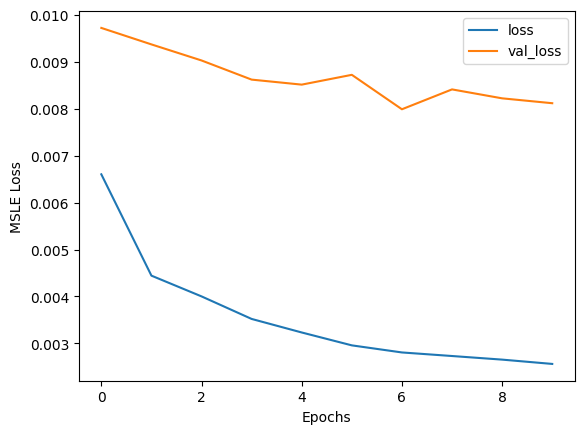

73/73 [==============================] - 0s 1ms/step
Threshold =  0.0050636705121992745
32/32 [==============================] - 0s 1ms/step


0.94

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout

data = pd.read_csv("ECGdataset(Ass4)/ecg_autoencoder_dataset.csv", header = None)
data

features = data.drop(140, axis = 1)
features.head()

target = data[140]
target.head()

x_train,x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, stratify=target)

train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())


class AutoEncoder(Model):
  def __init__(self, output_units, ldim=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(ldim, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded



model = AutoEncoder(output_units=x_train_scaled.shape[1])

model.compile(loss='msle', optimizer='adam', metrics=['mse'])
epochs=10

history = model.fit(x_train_scaled, x_train_scaled, epochs = epochs, validation_data=(x_test_scaled, x_test_scaled))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()



def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  train_loss = tf.keras.losses.msle(reconstructions, x_train_scaled)
  threshold = np.mean(train_loss.numpy() + np.std(train_loss.numpy()))
  return threshold

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x : 0.0 if x == True else 1.0)
    return preds

threshold = find_threshold(model, x_train_scaled)
print("Threshold = ", threshold)

predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)




## Tranfer Learning Object detection


Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


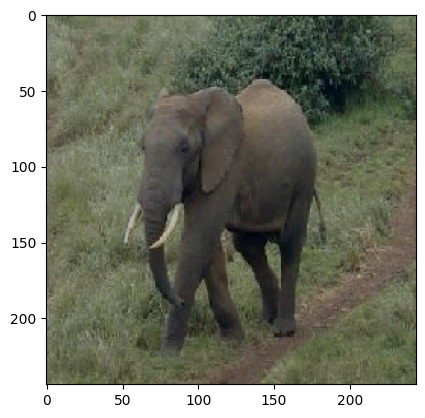

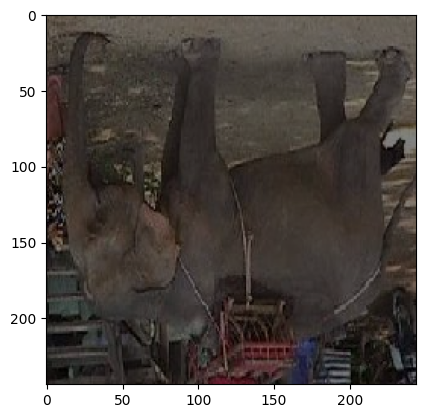

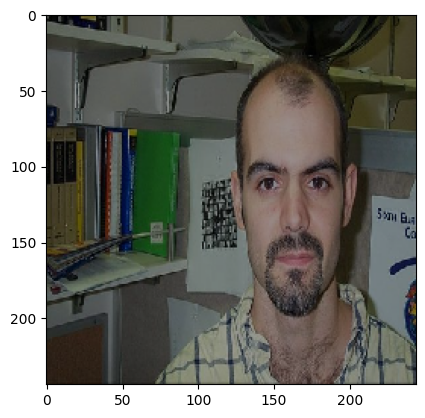

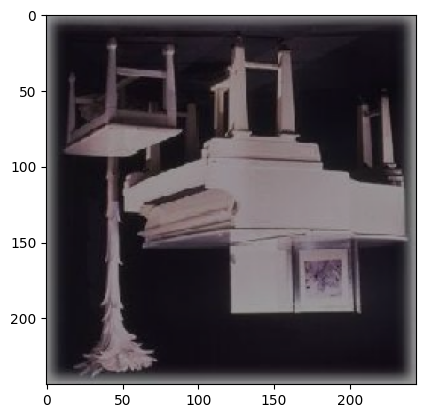

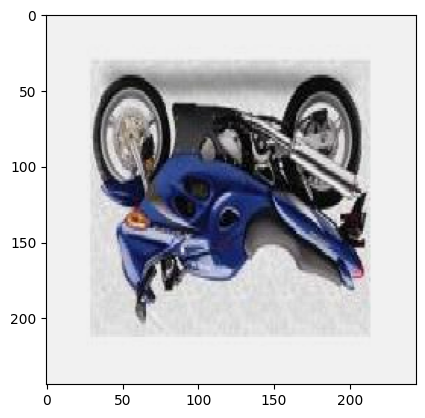

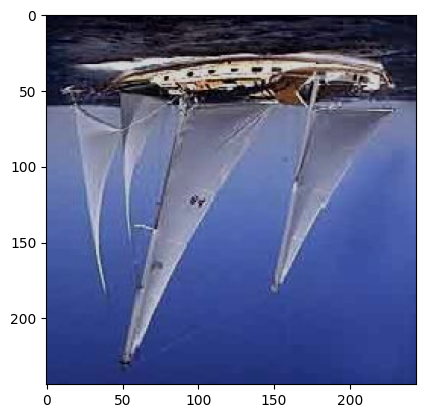

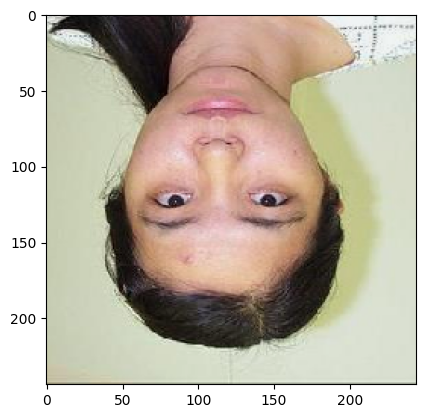

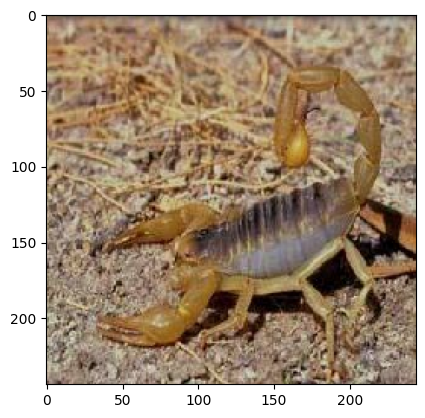

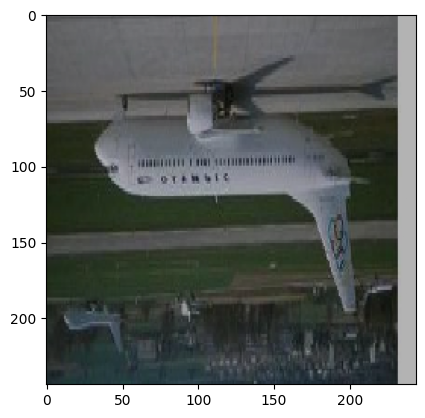

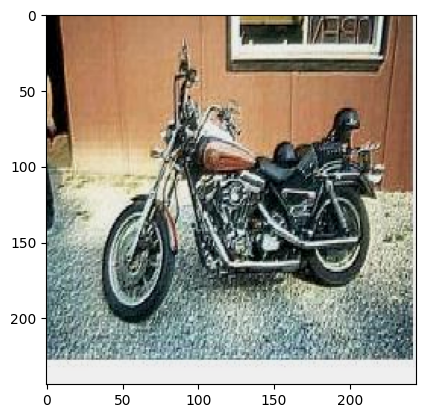

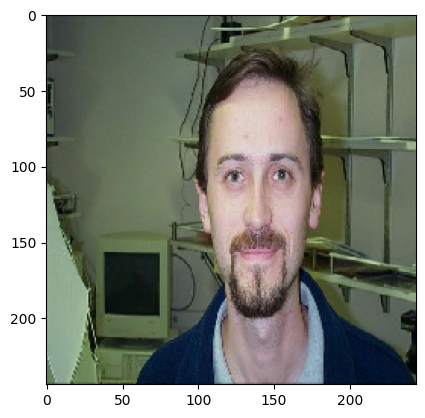

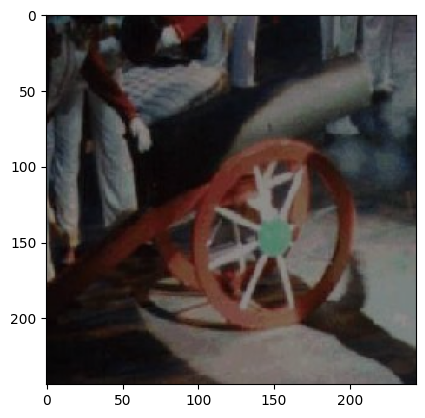

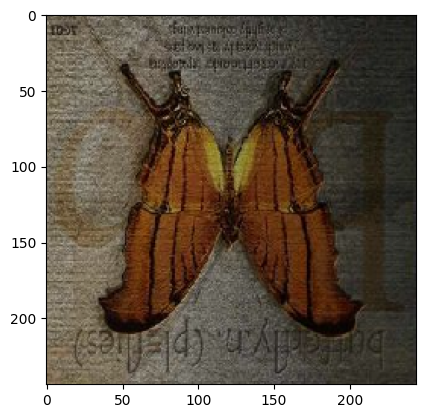

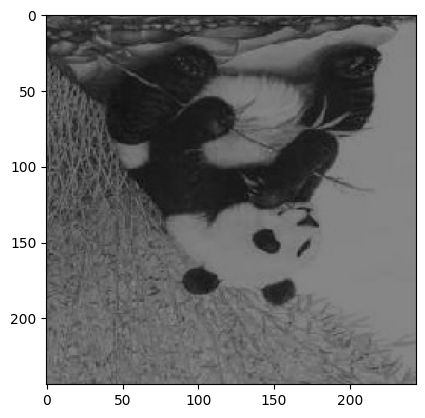

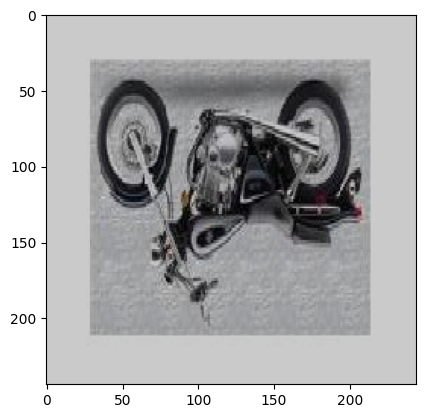

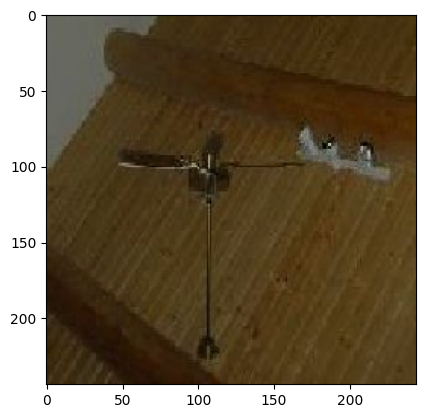

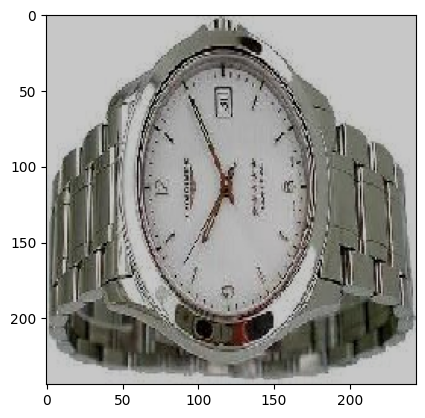

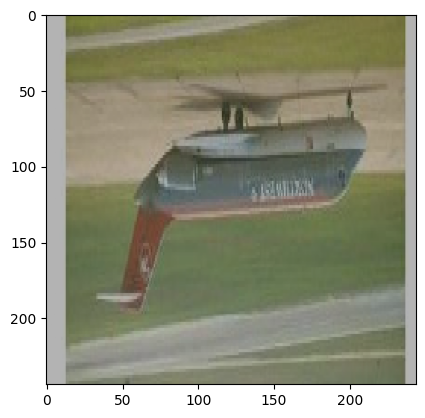

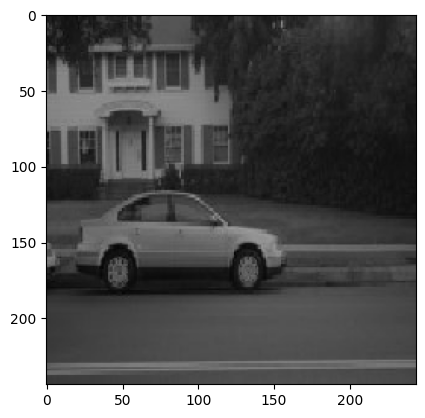

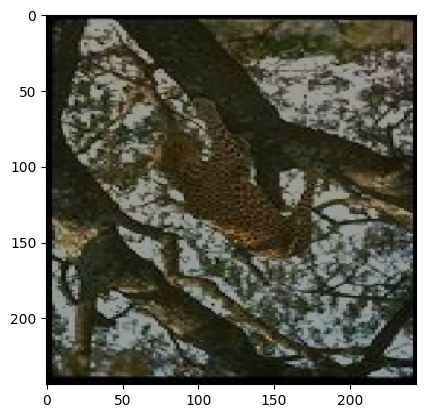

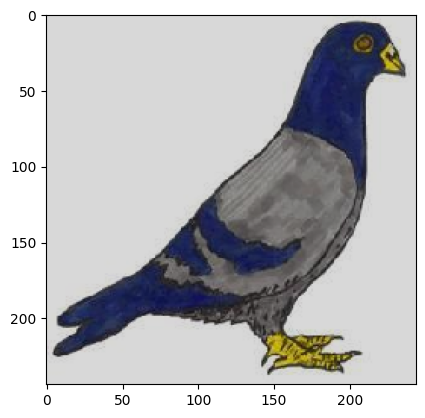

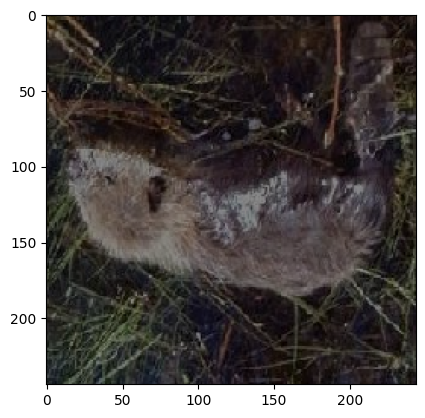

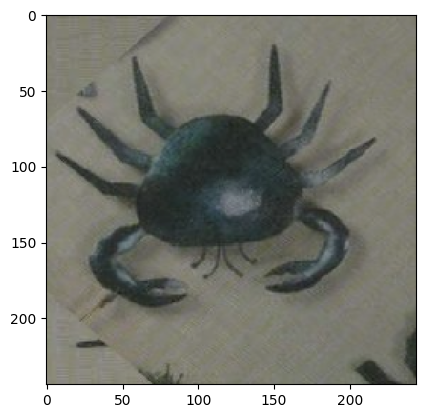

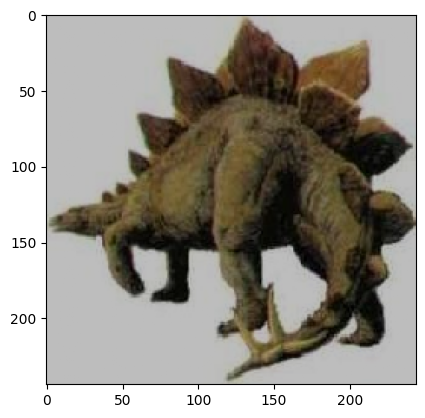

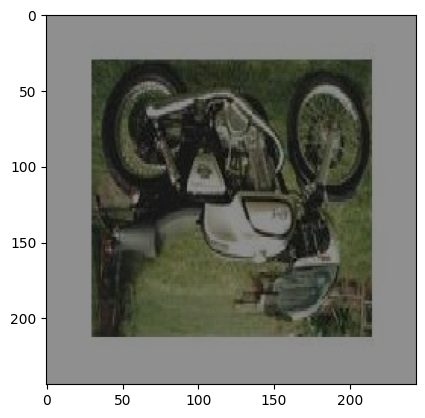

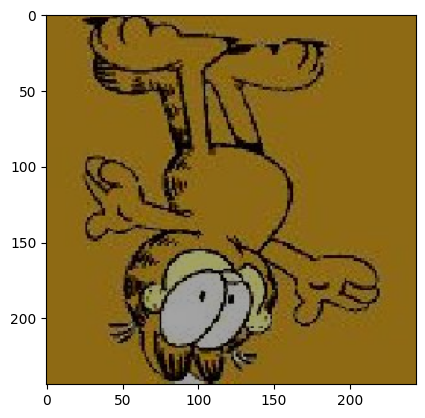

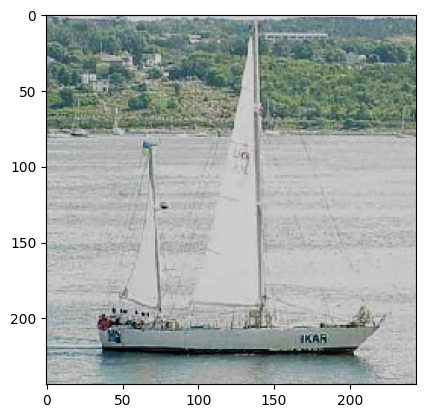

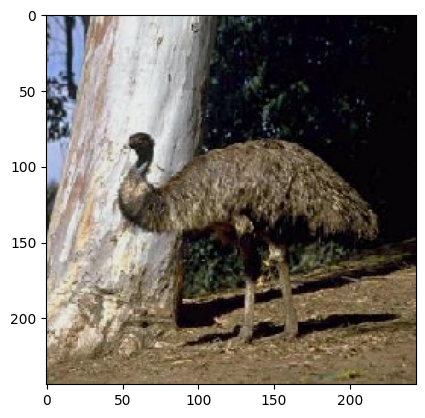

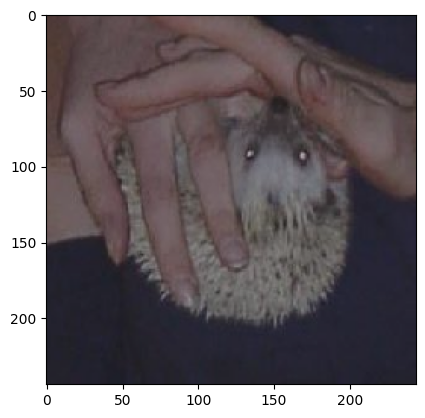

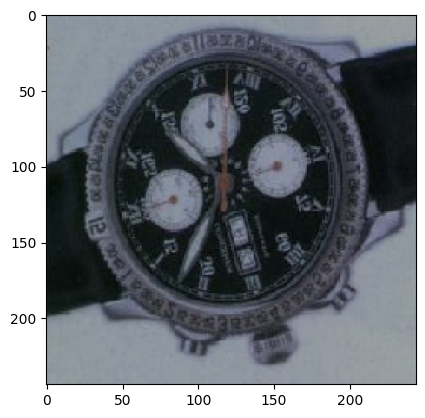

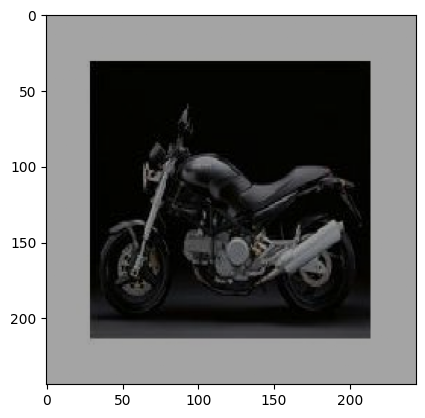

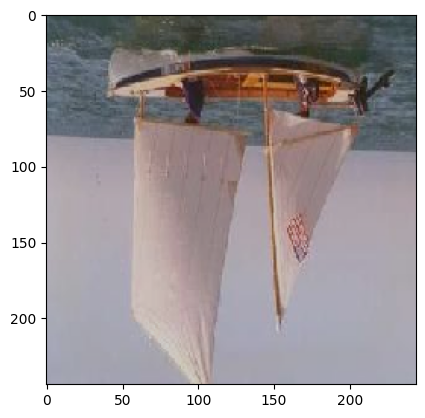

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 512)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_22 (Dense)            (None, 102)               470118    
                                                                 
Total params: 15184806 (57.93 MB)
Trainable params: 470118 (1.79 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 433s 107s/step - loss: 4.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy
from keras.metrics import Accuracy
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import MaxPooling2D, Flatten, Dense


img_generator = ImageDataGenerator(brightness_range = (0.5, 1), 
                                   channel_shift_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  rescale = 1.0 / 255,
                                  validation_split = 0.3)

root_dir = "D:\Jupyter Notebook\TransferLearning\Object Detection(Ass6)\caltech-101-img"

img_generator_flow_train = img_generator.flow_from_directory(
    directory = root_dir,
    target_size = (244, 244),
    batch_size = 32,
    shuffle = True,
    subset = "training"
)

img_generator_flow_valid = img_generator.flow_from_directory(
    directory = root_dir,
    target_size = (244, 244),
    batch_size = 32,
    shuffle = True,
    subset = "validation"
)


imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

model_path = "D:/DSBDA_Assignment/Deep Learning/LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(input_shape=(224, 224, 3),
                   include_top = False, 
                   weights = model_path)


base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(102, activation = "softmax"))

model.summary()


adam  = Adam(0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(img_generator_flow_train, 
          validation_data = img_generator_flow_valid, 
          steps_per_epoch=5,
                    batch_size = 32,
          epochs = 10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('testing_accuracy')
plt.ylabel('training_accuracy')
plt.legend()
plt.show()

base_model.trainable = True

model.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adam')
history = model.fit(img_generator_flow_train, 
          validation_data = img_generator_flow_valid, 
          steps_per_epoch=5,
          batch_size = 32,
          epochs = 10)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('testing_accuracy')
plt.ylabel('training_accuracy')
plt.legend()
plt.show()




# CBOW 


In [ ]:
# Install gensim
!pip install gensim

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import gensim

# Sample text document
document = "The quick brown fox jumps over the lazy dog. The dog barked at the fox."

# Tokenize and preprocess
tokenizer = Tokenizer()
tokenizer.fit_on_texts([document])
word2idx = tokenizer.word_index
idx2word = {v: k for k, v in word2idx.items()}
vocab_size = len(word2idx) + 1  # Vocabulary size (including padding)

# Convert a document to a sequence of word indexes
word_sequence = tokenizer.texts_to_sequences([document])[0]

# Function to generate CBOW training data
def generate_cbow_data(data, window_size, total_vocab):
    total_length = window_size * 2
    for idx, word in enumerate(data):
        context_word = []
        target = []

        begin = idx - window_size
        end = idx + window_size + 1
        context_word.append([data[i] for i in range(begin, end) if 0 <= i < len(data) and i != idx])
        target.append(word)

        contextual = sequence.pad_sequences(context_word, maxlen=total_length)
        final_target = to_categorical(target, total_vocab)
        yield (contextual, final_target)

# Generate CBOW training data
X_train = []
y_train = []

# Populate X_train and y_train from the generator
for x, y in generate_cbow_data(word_sequence, window_size=2, total_vocab=vocab_size):
    X_train.append(x[0])  # x is a list containing the context sequence
    y_train.append(y[0])  # y is a one-hot encoded target

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Set embedding dimensions
embedding_dim = 100

# Build CBOW model
cbow_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=4),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),  # Average embeddings of context words
    Dense(vocab_size, activation='softmax')
])



# Compile the model
cbow_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cbow_model.fit(X_train, y_train, epochs=100, verbose=1)

# Save word embeddings to a file
word_embeddings = cbow_model.layers[0].get_weights()[0]  # Extract embeddings from the first layer

# Write embeddings in the required format for Gensim
with open('word_embeddings.txt', 'w') as f:
    # Write the header with vocab_size and embedding_dim
    f.write(f"{vocab_size-1} {embedding_dim}\n")  # Exclude padding token (index 0)
    
    # Write each word and its corresponding embedding
    for i in range(1, vocab_size):  # Skip index 0 (padding token)
        word = idx2word[i]
        embedding = word_embeddings[i]
        f.write(f"{word} {' '.join(map(str, embedding))}\n")

print("Word embeddings saved to 'word_embeddings.txt'.")
word_vectors = gensim.models.KeyedVectors.load_word2vec_format('word_embeddings.txt', binary=False)
print(word_vectors.most_similar(positive=['fox']))


